<a href="https://colab.research.google.com/github/jatoja123/solvro-ai-wdrozenie/blob/main/Filip_ML_WDR_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wstęp
## Cel ćwiczenia
W tym notebooku głównym celem jest żeby poprawnie przeprowadzić "standardowe" ML flow i przypomnieć sobie/ popracować z biblotekami sklearn, numpy, pandas.
Zadanie będzie wymagało zrobienia Exploratory Data Analysis, a następnie na jej podstawie wykonania preprocessingu danych oraz puszczenie modelu.

### Ogólne informacje do zadania:
#### 1. Zbiór danych
czyli to na czym będziemy pracowac w tym zadaniu. Jest to zbiór [Bank Marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing), na którym do wykonania jest zadanie z klasyfikacji tak jak opisane w repozytorium. Polecam skorzystać z `ucimlrepo` aby go zainstalować.



#### 2. EDA

czyli poznaj swoje dane, a przede wszystkim oceń ich jakość. Potraktuj ten etap jako upewnienie się, że to, co wejdzie do Twojego modelu, jest „czyste” i nie zawiera żadnych niespodziewanych wartości w poszczególnych kolumnach  takich, które w najlepszym przypadku zwróciłyby błąd, a w najgorszym doprowadziły do wytrenowania słabego modelu.
Pamiętaj: *Garbage in, garbage out.* Z pustego nawet Salomon nie naleje, nieważne jak bardzo będziemy dobierać hiperparametry.
Poniżej kilka pomocniczych pytań, które mogą naprowadzić, co należy sprawdzić i na co uważać na etapie EDA:

* czy dane załadowały się prawidłowo
* czy typy kolumn odpowiadają ich zawartości; czy potrzebujemy zmienić typ (np. wiek powinien być w `int`, a nie w typie „object”)
* czy mamy brakujące wartości w jakichś kolumnach- jeśli tak, to co z nimi robimy (usuwamy wiersze? kolumny? uzupełniamy brak?); jeśli uzupełniamy, to w jaki sposób, by było to optymalne. Istnieje kilka prostych metod (mediana, moda, średnia), ale w praktyce coraz częściej korzysta się z bardziej zaawansowanych imputerów (KNN Imputer, MICE itp.)
* czy brakująca wartość to zawsze Null/NaN? Czy dataset może używać innych znaczników braków (np. „?”, „missing”, „-999”)?
* czy wartości w kolumnach mają sens (ujemny wiek, BMI równe 0 itp.) i jak je traktować
* jak wyglądają rozkłady wartości kolumn, czy takich rozkładów się spodziewaliśmy
* czy mamy wartości odstające? Jeśli tak, to czy wynikają one z błędów (np. wzrost człowieka 18.0 m, źle wstawiony przecinek), czy mogą być prawdopodobne w prawdziwym świecie (np. miesięczny zarobek 500 tys. zł)? Co zrobić z takimi outlierami? Jak je wykryć (np. IQR, Z-score, Isolation Forest)?
* czy mamy kolumny wysoko skorelowane ze sobą; czy taka korelacja jest dla naszego modelu korzystna czy szkodliwa; jak ją zwizualizować (np. heatmapa); jak ją rozwiązać (np. usunięcie jednej z kolumn, PCA)
* czy format naszych danych jest „model-friendly”? Czy musimy zastosować jakieś kodowanie zmiennych (np. one-hot encoding, target encoding)?
* czy powinniśmy standaryzować / normalizować dane? Kiedy warto zastosować jedno, a kiedy drugie? Czy są przypadki, gdzie nie należy tego robić, a takie, gdzie jest to absolutnie konieczne?
* czy są kolumny, które na pewno usuniemy, bo nic nie wniosą do modelu albo mogą mu szkodzić (np. ID, kolumny z dużą liczbą unikalnych wartości bez znaczenia semantycznego)
* czy między naszymi danymi zachodzi jakaś istotna statystycznie zależność? Jeśli tak, to wykonajmy testy statystyczne, aby to potwierdzić (np. chi-kwadrat dla zmiennych kategorycznych, ANOVA, testy normalności, testy na homogeniczność wariancji)

Oczywiście nie musicie odpowiadać na wszystkie te pytania, bo nie każdy zbiór będzie wymagał rozwiązywania wszystkich problemów. Warto jednak pamiętać, że zbiór danych to fundament- jego zrozumienie może tylko pomóc w zaprojektowaniu dobrego modelu.

#### 3. Modelowanie

czyli należy wykorzystać ładnie przygotowane dane do zbudowania modelu. Wiadomo, że istnieją modele, które często zapewniają wysokie metryki już „z natury”, np. XGBoost. Warto jednak wziąć pod uwagę, że:

* nie ma co strzelać z armaty do komara- nie bierz XGBoosta, jeśli problem sensownie rozwiązuje regresja logistyczna
* im bardziej interpretowalny model, tym lepiej- zarówno przy dalszym rozwijaniu, jak i przy próbie wdrażania go w systemach produkcyjnych
* przy mniejszych zbiorach trenowanie trwa szybko, więc warto przetestować różne typy modeli i różne konfiguracje hiperparametrów
* wyciek wiedzy (*data leakage*) to jedno z największych ryzyk- kluczowe jest upewnienie się, że żadna informacja z przyszłości (np. ze zbioru testowego, albo z kolumn pochodnych) nie trafi do części treningowej
* w większości modeli mamy co najmniej kilka hiperparametrów, które mogą znacząco wpłynąć na jakość predykcji; powinniśmy je przetestować i dobrać tak, by model osiągał jak najlepsze wyniki
* najbezpieczniej jest używać cross-walidacji- i to na niej dobierać hiperparametry
* obliczenie wielu metryk nie zaszkodzi, natomiast musimy jasno zdefiniować, która metryka jest najważniejsza z perspektywy celu zadania (accuracy? recall? precision? AUC? MAE?)




## **KROKI DO WYKONANIA ZADANIA- minimalny zakres prac (EDA + Modelowanie)**

To zadanie jest wyjątkowo otwarte i można je wykonać na wiele sposobów, w zależności od kreatywności i podejścia. Natomiast istnieje **pewne minimum**, na którym na pewno trzeba się skupić, aby zadanie zostało zaliczone


**EDA (Exploratory Data Analysis)**

* sprawdzenie brakujących danych oraz- jeśli będzie potrzeba- ich uzupełnienie odpowiednią metodą
* sprawdzenie wartości odstających i decyzja, co z nimi zrobić (usunąć, poprawić, zostawić)
* sprawdzenie rozkładów **zmiennej decyzyjnej** oraz najważniejszych zmiennych wejściowych
* zbadanie, jak dokładnie zformatować dane, aby model mógł je poprawnie przyjąć (np. typy danych, kodowanie zmiennych, standaryzacja)
* zbadanie zależności między zmiennymi (np. korelacje, testy statystyczne, analiza współzależności)
* zadbanie o warstwę wizualną tam, gdzie jest to możliwe i pomocne (wykresy, heatmapy, histogramy, boxploty itp.)
* krótki wniosek po EDA- co możemy powiedzieć o danych, co w nich odkryliśmy, jakie są istotne problemy i na co należy uważać podczas modelowania


**MODELOWANIE**

* wybranie minimum **3 różnych modeli** reprezentujących różne rodziny (np. regresja logistyczna, drzewa, modele ensemble, SVM, sieć neuronowa)
* dla każdego modelu sprawdzenie minimum **2 hiperparametrów** (dobieranych na zbiorze walidacyjnym)
* dobór hiperparametrów wykonany za pomocą mechanizmu **cross-walidacji**
* sprawdzenie ostatecznych wyników na **zbiorze testowym**, po zakończeniu strojenia hiperparametrów
* użycie techniki SHAP na dowolnym wytrenowanym modelu w celu zbadania wyjaśnialności- wybrać minimum jeden przykład poprawnej predykcji oraz jeden przykład błędnej, a następnie je zbadać.
* czytelna prezentacja wyników i metryk (tabela porównawcza, wykresy, krótki komentarz)
* wnioski i konkluzje z eksperymentu- który model działa najlepiej, dlaczego, jakie są ograniczenia, co można poprawić

**WAŻNE UWAGI DO ZADANIA**

* Pamiętajcie, że analizę zbioru wykonujemy na **całym dostępnym zbiorze danych**. **Natomiast** kiedy przechodzimy do transformacji zbioru danych (standaryzacja, uzupełnianie brakujących danych itp.), wykonujemy ją **wyłącznie na podstawie rozkładu zbioru *trenującego***.
  Przykładowo: parametry używane do standaryzacji kolumn obliczamy na zbiorze trenującym, a następnie stosujemy je do zbioru walidacyjnego i testowego. W przeciwnym przypadku dochodzi do **wycieku wiedzy** (więcej informacji w materiałach dodatkowych).

* Biblioteka `sklearn` jest dobrze przystosowana do takiego scenariusza dzięki wykorzystaniu tzw. obiektów **Pipeline**. Użycie ich nie jest wymagane, ale może ułatwić pisanie kodu oraz pomóc w uniknięciu wycieku wiedzy.

* Do wykonania zadania powinny wystarczyć standardowe biblioteki pythonowe, wymienione poniżej. Oczywiście nie trzeba się do nich ograniczać — można korzystać również z innych:

  * **sklearn** – podstawowa biblioteka do ML w Pythonie. Posiada prosty i intuicyjny interfejs i zawiera większość potrzebnych operacji.
  * **pandas** – do operacji na danych tabelarycznych.
  * **matplotlib / seaborn** – do wizualizacji.
  * **numpy** – do obliczeń i transformacji matematycznych (większość kluczowych bibliotek opiera się na NumPy).
  * **statistics** – operacje statystyczne.


Dodatkowe materiały:
- [modele w sklearnie](https://scikit-learn.org/stable/supervised_learning.html)
- [jeden z tutorialów do EDA](https://medium.com/data-science/a-data-scientists-essential-guide-to-exploratory-data-analysis-25637eee0cf6)
- [co to wyciek danych](https://www.ibm.com/think/topics/data-leakage-machine-learning)
- [niezbalansowane dane](https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets)
- [wyjaśnialność za pomocą SHAP-a](https://shap.readthedocs.io/en/latest/)
- [brakujące wartości](https://medium.com/@ajayverma23/data-imputation-a-comprehensive-guide-to-handling-missing-values-b5c7d11c3488)
- [wizualizacja wielowymiarowych danych w 2D](https://medium.com/@laakhanbukkawar/pca-vs-t-sne-vs-umap-visualizing-the-invisible-in-your-data-92cb2baebdbb)
- [wartości odstające](https://www.geeksforgeeks.org/data-analysis/what-is-outlier-detection/)
- [cross validacja](https://scikit-learn.org/stable/modules/cross_validation.html)
- [pipelines w sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)
- [OneHotEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- cała dokumentacja sklerana

# EDA
Podążam [tutorialem](https://scikit-learn.org/stable/supervised_learning.html).

In [87]:
!pip install ucimlrepo
!pip install ydata-profiling
!pip install shap

In [88]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

bank_marketing = fetch_ucirepo(id=222)

X = bank_marketing.data.features
y = bank_marketing.data.targets.to_numpy().ravel()

In [89]:
df = pd.DataFrame(
    bank_marketing.data.features,
    columns=bank_marketing.data.feature_names
)
df["target"] = y
print(df.dtypes)

age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
target         object
dtype: object


In [90]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df,title="Profil Danych Bankowych")
profile.to_file("bank_marketing_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 17/17 [00:03<00:00,  4.65it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Analiza danych
- Kolumny są typu int64 lub object (dla kategorii)
- Wartości docelowe są niezbalansowane, więc użyję stratify przy podziale na dane testowe i treningowe
- Kolumna Pdays ma bardzo dużo ujemnych wartości, więc uznałem że zamienię to na prostszą kolumnę previous_contact z wartością binarną. Usuwam pdays i previous bo niosą podobną informację (bardzo wysoka korelacja).
- Zamieniam brakujące wartości kategorii na 'unknown'. Kolumna poutcome ma bardzo dużo brakujących wartości, ale wydaje mi się istotną informacją, więc na razie nie usuwam.
- Kategorie trzeba zamienić na liczby używając OneHotEncoding, bo niektóre modele wymagają liczb a nie stringów
- Kolumny balance i previous mają dużo zer, ale nie jest to problem. Dla balance 0 oznacza brak balansu w banku, dla previous 0 oznacza brak wcześniejszego kontaktu.
- Wszystkie istotne informacje można zobaczyć w wygenerowanym bank_marketing_profile.html
(albo [tu](https://drive.google.com/file/d/1EZ1w40N5TsO6xBLnIciLO4x7eFu_uEiC/view?usp=drive_link))

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=67, stratify=y) # stratify bo zmienna docelowa niezbalansowane

def process_features(df):
  df = df.copy()
  df["previous_contact"] = (df["pdays"] > 0).astype(int)
  #df = df.drop(columns=["previous", "pdays", "month"])
  df = df.drop(columns=["previous", "pdays"])
  return df

X_train = process_features(X_train)
X_test = process_features(X_test)

num_features = X_train.select_dtypes(include=["int64"]).columns # kolumny numeryczne
cat_features = X_train.select_dtypes(include=["object"]).columns # kolumny kategorii

num_pipeline = Pipeline(steps=[
  ("imputer", SimpleImputer(strategy="median")), # brakujace wartosci numeryczne wypelniam mediana
  ("scaler", StandardScaler()) # standaryzacja przyda sie dla modeli
])

cat_pipeline = Pipeline(steps=[
  ("imputer", SimpleImputer(strategy="constant", fill_value="unknown")), # brakujace kategorie wypelniam unknown
  ("onehot", OneHotEncoder(handle_unknown="ignore")) # zamiana kategorii na liczby, tego wymagaja niektore modele
])

preprocessor = ColumnTransformer(
  transformers=[
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features),
  ]
)

preprocessor.fit(X_train)
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)

### Wnioski o EDA
- trzeba uważać na brakujące wartości, bo coś trzeba z nimi zrobić
- zawsze sprawdzać czy kategoryczne wartości są zbalansowane
- obejrzeć rozkłady wartości numerycznych - czy powinny mieć rozkład normalny?
- powyższe dwa punkty są jeszcze ważniejsze dla wartości docelowych
- które zmienne niosą tę samą wartość i czy nie warto ich usunąć?
- sprawdzić odstające wartości i ustalić czy są problematyczne

# Modelowanie

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# class_weight="balanced" aby odpowiednio traktowac niezbalansowane wartosci
classifiers = [
  (
    "logreg",
    LogisticRegression(max_iter=1000, class_weight="balanced", solver="liblinear"), #libinear zeby dzialalo penalty=l1, inaczej jest blad
    {
      "model__C": [2, 1, 0.5, 0.1],
      "model__penalty": ["l1", "l2"],
    }
  ),
  (
    "knn",
    KNeighborsClassifier(3),
    {
        "model__n_neighbors": [3, 5, 7, 11],
        "model__weights": ["uniform", "distance"],
    }
  ),
  (
    "mlp",
    MLPClassifier(alpha=1, max_iter=500, random_state=42),
    {
      "model__hidden_layer_sizes": [(20,), (10,10), (10,5,5)],
      "model__alpha": [0.1, 0.01, 0.001],
    }
  )
]




In [98]:
# trenowanie

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
f1_yes = make_scorer(f1_score, pos_label="yes")

results = []
best_pipes = {}
for name, model, params in classifiers:
  print(f"---- Model {name} -------")
  pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", model),
  ])

  # szukanie najlepszych hiperparametrow
  grid = GridSearchCV(
      estimator=pipe,
      param_grid=params,
      scoring=f1_yes,
      cv=cv,
      n_jobs=-1
  )

  grid.fit(X_train, y_train)

  print("Najlepsze hiperparametry:", grid.best_params_)
  print("Najlepszy wynik f1:", grid.best_score_)


  best_pipe = grid.best_estimator_
  best_pipes[name] = best_pipe      # <<==== ZAPISZ
  y_pred = best_pipe.predict(X_test)

  row = {
    "model": name,
    "accuracy": accuracy_score(y_test, y_pred), # srednia metryka bo wartosci docelowe byly niezbalansowane
    "precision_pos": precision_score(y_test, y_pred, pos_label='yes'), #ile z przewidzianych yes faktycznie bylo yes
    "recall_pos": recall_score(y_test, y_pred, pos_label='yes'), # ile ze wszystkich yes bylo dobrze przewidzianych
    "f1_pos": f1_score(y_test, y_pred, pos_label='yes'), # nie wiem jak to dziala ale podobno sie uzywa (chyba chodzi o wyscigi idk)
  }
  results.append(row)

---- Model logreg -------
Najlepsze hiperparametry: {'model__C': 0.1, 'model__penalty': 'l1'}
Najlepszy wynik f1: 0.5528591354899411
---- Model knn -------
Najlepsze hiperparametry: {'model__n_neighbors': 3, 'model__weights': 'distance'}
Najlepszy wynik f1: 0.4396166679628501
---- Model mlp -------
Najlepsze hiperparametry: {'model__alpha': 0.001, 'model__hidden_layer_sizes': (10, 5, 5)}
Najlepszy wynik f1: 0.576332898959924


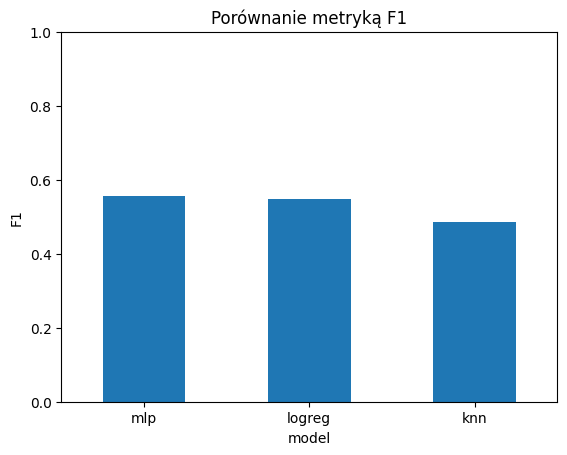

In [99]:
# porownanie modeli wzgledem F1
results_df = pd.DataFrame(results).set_index("model").sort_values("f1_pos", ascending=False)

ax = results_df["f1_pos"].plot(kind="bar", rot=0)
ax.set_ylim(0, 1)
ax.set_ylabel("F1")
ax.set_title("Porównanie metryką F1")
plt.show()

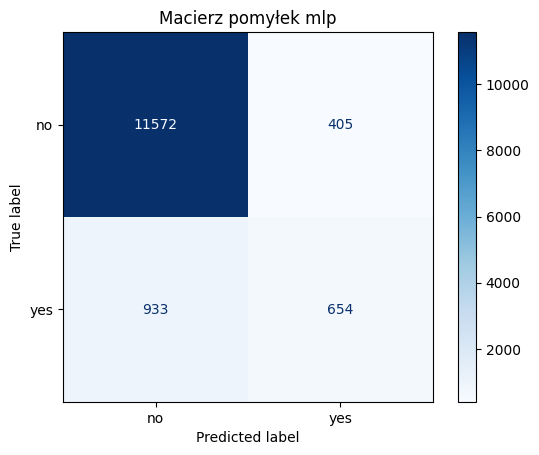

In [93]:
best_mlp = best_pipes["mlp"]
best_pred = best_mlp.predict(X_test)

# pokaz siatke pomylek
cm = confusion_matrix(y_test, best_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_mlp.classes_)
disp.plot(cmap="Blues")
disp.ax_.set_title(f"Macierz pomyłek {name}")
plt.show()

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

---- Poprawna predykcja ----
Prawdziwa odpowiedź = no  | Predykcja = no
Wiersz:
        age          job  marital  education default  balance housing loan  \
15183   49  blue-collar  married  secondary      no      388      no   no   

         contact  day_of_week  duration  campaign poutcome  previous_contact  
15183  telephone           17       265         2      NaN                 0  


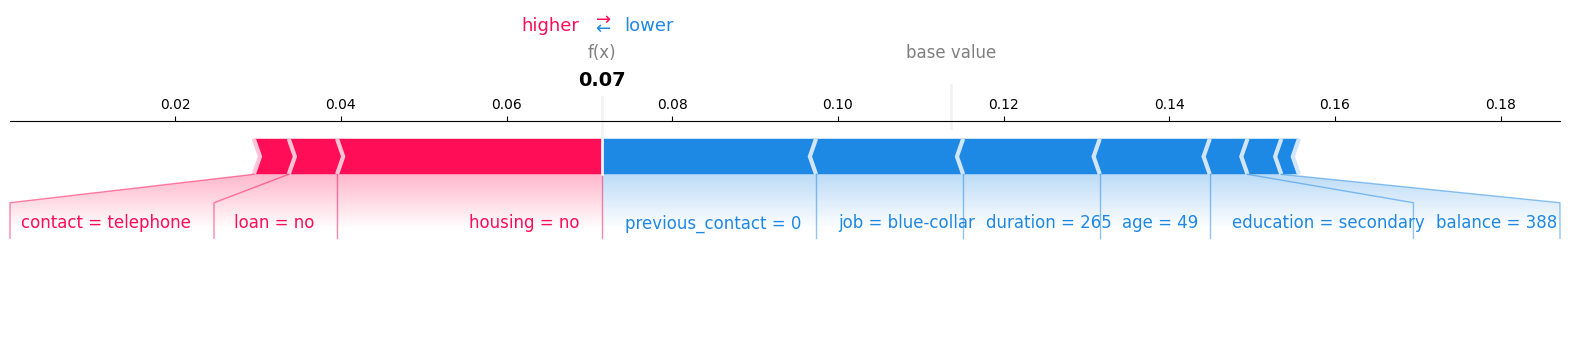


---- Błędna predykcja ----
Prawdziwa odpowiedź = yes  | Predykcja = no
Wiersz:
        age          job marital education default  balance housing loan  \
41933   31  blue-collar  single       NaN      no     6281      no   no   

        contact  day_of_week  duration  campaign poutcome  previous_contact  
41933  cellular           22       257         1    other                 1  


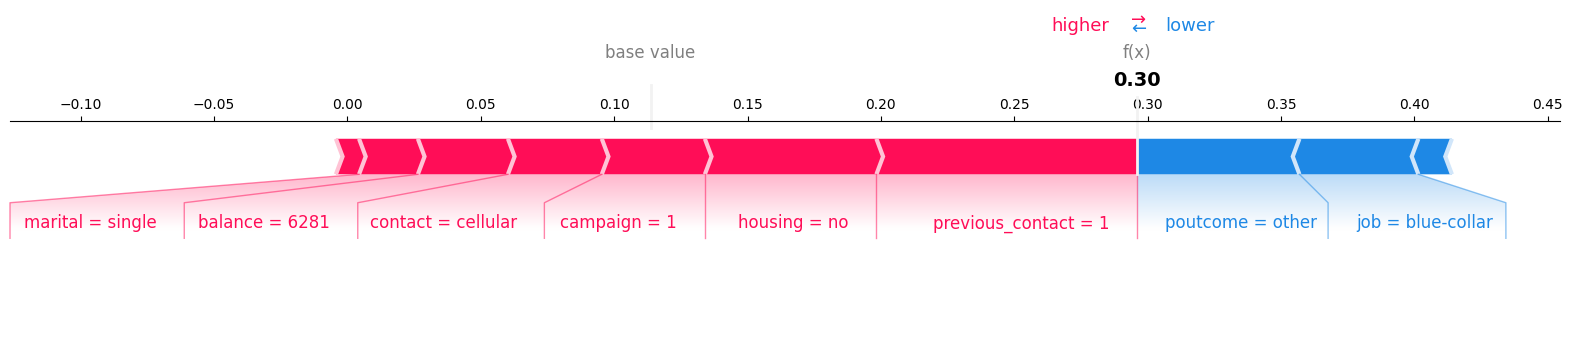

In [94]:
import shap
shap.initjs()

first_correct = np.where(best_pred == y_test)[0][0]
first_wrong = np.where(best_pred != y_test)[0][0]
x_correct = X_test.iloc[[first_correct]]
x_wrong   = X_test.iloc[[first_wrong]]

# Shapowa magia
idx_yes = list(best_mlp.classes_).index("yes")
background = X_train.sample(200, random_state=42)

def mlp_yes_proba(data):
    df = pd.DataFrame(data, columns=X_train.columns)
    return best_mlp.predict_proba(df)[:, idx_yes]

explainer = shap.KernelExplainer(mlp_yes_proba, background)
shap_values_correct = explainer.shap_values(x_correct, nsamples=100)
shap_values_wrong   = explainer.shap_values(x_wrong, nsamples=100)

print("---- Poprawna predykcja ----")
print("Prawdziwa odpowiedź =", y_test[first_correct], " | Predykcja =", best_pred[first_correct])
print("Wiersz:\n", x_correct)
shap.force_plot(
    explainer.expected_value,
    shap_values_correct[0],
    x_correct,
    matplotlib=True
)

print("\n---- Błędna predykcja ----")
print("Prawdziwa odpowiedź =", y_test[first_wrong], " | Predykcja =", best_pred[first_wrong])
print("Wiersz:\n", x_wrong)
shap.force_plot(
    explainer.expected_value,
    shap_values_wrong[0],
    x_wrong,
    matplotlib=True
)

## Wnioski
- Najlepiej wypadł model MLP, z wynikiem f1 0.57 i dokładnością 90%. Druga była regresja logistyczna, potem KNN.
- Najlepsze hiperparametry MLP to alpha=0.01 i trzy ukryte warstwy z 10,5,5 neuronami.
- Intuicyjnie spodziewałem się, że trzy ukryte warstwy dadzą lepszy wynik. Więcej warstw pozwoliło na stworzenie bardziej precyzyjnych reguł.
- Wyjaśnienia SHAPa pokazały, że bardzo duży wpływ na wynik ma miesiąc, co jest dosyć ciekawą zależnością i pytanie czy tak powinno być, i czy nie jest to wynik przetrenowania.
- Sprawdziłem wyniki po usunięciu kolumny month: wynik f1 MLP spadł do 0.48, za to regresja logiczna spadła tylko z 0.55 na 0.52.
- Zauważyłem, że na wynik duży wpływ ma praca oraz czy był poprzedni kontakt. Klienci u których był taki kontakt częsciej przystają na ofertę marketingową.


Co można poprawić:
- Optymalizacja pod kątem metryki f1 może nie być właściwa i taki model może być mało użyteczny w praktyce.
- Kombinacje hiperparametrów są uproszczone i wybrane na oko, lepiej byłoby zrobić dokładniejsze przeszukanie.